In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
# from shapely.geometry import Polygon
import os
import datetime
import matplotlib.pyplot as plt
import contextily as cx
import seaborn as sns

## read data

In [ ]:
path = 'process data/dataset1/'

In [ ]:
df = pd.read_csv(path + 'dataset_1.csv')
df_cleaned = df[df['price_sqft_location'] != r'\N']
df_cleaned

,latitude,longitude,location_type,price_sqft_location
0,22.291246,114.198296,\N,14695.6
11,22.342749,114.183385,building-apartments,15450.666666666666
12,22.342748,114.183376,building-apartments,15450.666666666666
13,22.342758,114.183382,building-apartments,15450.666666666666
14,22.372702,114.178356,\N,23536.636363636364
...,...,...,...,...
62968895,22.321530,114.260220,\N,13971.285714285714
62968896,22.321531,114.260227,\N,13971.285714285714
62968897,22.321526,114.260260,\N,13971.285714285714
62968898,22.321577,114.260256,\N,13971.285714285714


In [ ]:
df_cleaned['price_sqft_location'] = pd.to_numeric(df_cleaned['price_sqft_location'], errors='coerce')
df_cleaned['price_sqft_location'].astype(float)
df_cleaned.dtypes

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6116\2958358194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_sqft_location'] = pd.to_numeric(df_cleaned['price_sqft_location'], errors='coerce')


latitude               float64
longitude              float64
location_type           object
price_sqft_location    float64
dtype: object

## location_type

In [ ]:
location_type_df = df_cleaned[['location_type']]
location_type_df = location_type_df.drop_duplicates()
location_type_list = location_type_df['location_type'].tolist()
location_type_df
## 125种location_type，包括\N

,location_type
0,\N
11,building-apartments
93,building-residential
118,building-grandstand
119,landuse-residential
...,...
1632244,road-path
2245366,building-semidetached_house
2405740,building-bungalow
5292646,building-yes;industrial


In [ ]:
# 把location_type_list的标点符号都替换成空格
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
location_type_std_list = []
for ele in location_type_list:
    for punctuation in punctuations:
        ele = ele.replace(punctuation, ' ')
    location_type_std_list.append(ele)

location_type_std_list

[' N',
 'building apartments',
 'building residential',
 'building grandstand',
 'landuse residential',
 'building roof',
 'transport railway station',
 'building construction',
 'building clinic',
 'pois museum',
 'building commercial',
 'building retail',
 'pois shelter',
 'building hospital',
 'building school',
 'building civic',
 'pois mall',
 'building industrial',
 'building warehouse',
 'landuse commercial',
 'road unclassified',
 'building podium',
 'pofw christian',
 'traffic parking multistorey',
 'building service',
 'pofw christian anglican',
 'building terrace',
 'traffic fuel',
 'building hotel',
 'building parking',
 'building office',
 'transport bus station',
 'building house',
 'building tower',
 'building government',
 'road primary',
 'building train station',
 'road secondary',
 'building university',
 'road footway',
 'road pedestrian',
 'pois market place',
 'road residential',
 'building church',
 'landuse industrial',
 'building college',
 'pois hotel',
 'road

In [ ]:
# 把location_type翻译成中文
location_type_cn_list = []

from translate import Translator
# 创建翻译器对象
translator= Translator(to_lang="zh")

step = 1
for ele in location_type_std_list:
    print("step:", step)
    translation = translator.translate(ele)
    location_type_cn_list.append(translation)
    step += 1

location_type_cn_list

step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 51
step: 52
step: 53
step: 54
step: 55
step: 56
step: 57
step: 58
step: 59
step: 60
step: 61
step: 62
step: 63
step: 64
step: 65
step: 66
step: 67
step: 68
step: 69
step: 70
step: 71
step: 72
step: 73
step: 74
step: 75
step: 76
step: 77
step: 78
step: 79
step: 80
step: 81
step: 82
step: 83
step: 84
step: 85
step: 86
step: 87
step: 88
step: 89
step: 90
step: 91
step: 92
step: 93
step: 94
step: 95
step: 96
step: 97
step: 98
step: 99
step: 100
step: 101
step: 102
step: 103
step: 104
step: 105
step: 106
step: 107
step: 108
step: 109
step: 110
step: 11

['N',
 '建造公寓',
 '建筑住宅',
 '搭建看台',
 '住宅用地',
 '建筑屋顶',
 '交通火车站',
 '建筑施工',
 '建筑诊所',
 'pois museum',
 '建筑商业',
 '建筑零售',
 'pois shelter',
 '建设医院',
 '建筑学校',
 'building Civic',
 'pois mall',
 '建筑工业',
 '建筑物仓库',
 '土地使用商业',
 '未分类道路',
 '搭建讲台',
 'pofw christian',
 '多层交通停车位',
 '建筑服务',
 'pofw基督教英国圣公会',
 '大楼露台',
 '交通燃料',
 '大厦酒店',
 '大楼停车场',
 '大楼办公室',
 '公交车站',
 '盖屋',
 '建筑塔楼',
 '建设政府',
 '道路主要',
 '建设火车站',
 '道路次级',
 '建筑大学',
 '道路人行道',
 '道路行人',
 '市场广场',
 '道路住宅',
 '建筑教堂',
 '土地利用工业',
 '建筑学院',
 'pois hotel',
 '道路服务',
 '建造售货亭',
 '建筑物公共',
 '建筑物交通',
 '交通和停车',
 '社区中心',
 'pois长凳',
 '建设幼儿园',
 '主链接',
 'pois马桶',
 '大厦垦博商厦',
 '体育中心',
 '基督教，天主教',
 '建造宿舍',
 'pois doctors',
 '建造厕所',
 'pois诊所',
 '道路次级环节',
 '基督教，新教',
 '建筑配售房屋',
 '道路三级',
 '建设警察局',
 'pOIS回收',
 'pofw基督教卫理公会',
 'pois convenience',
 '建筑消防站',
 '公路高速公路连接线',
 'pois景点',
 'pofw道教',
 '路步',
 '建筑工地',
 '建筑桥梁',
 '交通渡轮码头',
 '大厦大厅',
 '美食广场',
 'pois超市',
 '建筑物已分离',
 '建筑展位',
 '大楼体育馆',
 '建造寺庙',
 '道路后备箱',
 '建筑车库',
 '建设体育中心',
 '修建铁路',
 'pOIS公共建筑',
 'pois college',
 '建立宗教信仰',
 'pofw犹太

In [ ]:
location_type_data = {
    'location_type': location_type_list,
    'location_type_cn': location_type_cn_list
}
location_type_df_trans = pd.DataFrame(location_type_data)
location_type_df_trans

,location_type,location_type_cn
0,\N,N
1,building-apartments,建造公寓
2,building-residential,建筑住宅
3,building-grandstand,搭建看台
4,landuse-residential,住宅用地
...,...,...
120,road-path,道路路径
121,building-semidetached_house,建造半独立式住宅
122,building-bungalow,建筑平房
123,building-yes;industrial,建筑是工业


In [ ]:
# ## 保存数据：location_type_df_trans
# location_type_df_trans.to_csv(path + "location_type.csv", encoding='utf-8-sig', index=False)

In [ ]:
# 筛选住房相关的location type
# 来源(wiki-openstreetmap)：https://wiki.openstreetmap.org/wiki/Zh-hant:Key:building#%E5%85%AC%E5%85%B1%E8%A8%AD%E6%96%BD_(Civic_/_Amenity)
location_type_df = pd.read_csv(path + 'location_type.csv')
location_type_df
# is_home：0-不是住房；1-是住房；2-不确定

,location_type,location_type_cn,is_home
0,\N,N,0
1,building-apartments,建造公寓,1
2,building-residential,建筑住宅,1
3,building-grandstand,搭建看台,0
4,landuse-residential,住宅用地,1
...,...,...,...
120,road-path,道路路径,0
121,building-semidetached_house,建造半独立式住宅,1
122,building-bungalow,建筑平房,1
123,building-yes;industrial,建筑是工业,0


In [ ]:
location_type_df[location_type_df['is_home']==1]

,location_type,location_type_cn,is_home
1,building-apartments,建造公寓,1
2,building-residential,建筑住宅,1
4,landuse-residential,住宅用地,1
26,building-terrace,大楼露台,1
32,building-house,盖屋,1
83,building-detached,建筑物已分离,1
115,building-hut,建造小屋,1
121,building-semidetached_house,建造半独立式住宅,1
122,building-bungalow,建筑平房,1


In [ ]:
## 关联 df_cleaned 和 location_type_df
df_merged = df_cleaned.merge(location_type_df, on='location_type', how='left')
df_merged

,latitude,longitude,location_type,price_sqft_location,location_type_cn,is_home
0,22.291246,114.198296,\N,14695.600000,N,0
1,22.342749,114.183385,building-apartments,15450.666667,建造公寓,1
2,22.342748,114.183376,building-apartments,15450.666667,建造公寓,1
3,22.342758,114.183382,building-apartments,15450.666667,建造公寓,1
4,22.372702,114.178356,\N,23536.636364,N,0
...,...,...,...,...,...,...
23739710,22.321530,114.260220,\N,13971.285714,N,0
23739711,22.321531,114.260227,\N,13971.285714,N,0
23739712,22.321526,114.260260,\N,13971.285714,N,0
23739713,22.321577,114.260256,\N,13971.285714,N,0


In [ ]:
is_home_value_count = df_merged['is_home'].value_counts()
is_home_value_count

0    12806258
1    10933457
Name: is_home, dtype: int64

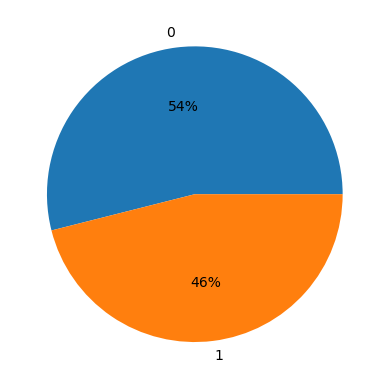

In [ ]:
## 建筑类型占比
plt.pie(is_home_value_count, labels=is_home_value_count.index, autopct='%1.f%%')
plt.show()

## 将价格数据转换为GeoDataFrame #building_price_gdf

In [ ]:
## 将价格数据转换为GeoDataFrame
geometry = gpd.points_from_xy(df_merged['longitude'], df_merged['latitude'])
building_price_gdf = gpd.GeoDataFrame(df_merged, geometry=geometry)
building_price_gdf.crs = 'EPSG:4326'
# building_price_gdf = building_price_gdf.iloc[:,2:]
building_price_gdf

,latitude,longitude,location_type,price_sqft_location,location_type_cn,is_home,geometry
0,22.291246,114.198296,\N,14695.600000,N,0,POINT (114.19830 22.29125)
1,22.342749,114.183385,building-apartments,15450.666667,建造公寓,1,POINT (114.18338 22.34275)
2,22.342748,114.183376,building-apartments,15450.666667,建造公寓,1,POINT (114.18338 22.34275)
3,22.342758,114.183382,building-apartments,15450.666667,建造公寓,1,POINT (114.18338 22.34276)
4,22.372702,114.178356,\N,23536.636364,N,0,POINT (114.17836 22.37270)
...,...,...,...,...,...,...,...
23739710,22.321530,114.260220,\N,13971.285714,N,0,POINT (114.26022 22.32153)
23739711,22.321531,114.260227,\N,13971.285714,N,0,POINT (114.26023 22.32153)
23739712,22.321526,114.260260,\N,13971.285714,N,0,POINT (114.26026 22.32153)
23739713,22.321577,114.260256,\N,13971.285714,N,0,POINT (114.26026 22.32158)


In [ ]:
# ## 保存数据：point_price
# building_price_gdf.to_csv(path + "point_price.csv", index=False)

## Building Shape File #building_shp

In [ ]:
## 读取香港building shape file
shapefile = gpd.read_file('Building_SHP/BUILDING_STRUCTURE.shp', encoding="GBK")
shapefile = shapefile.to_crs('EPSG:4326')
building_shp = shapefile[['OBJECTID', 'geometry']]
building_shp

,OBJECTID,geometry
0,1,"POLYGON ((113.84091 22.21870, 113.84090 22.218..."
1,2,"POLYGON ((113.84094 22.21863, 113.84095 22.218..."
2,3,"POLYGON ((113.84090 22.21867, 113.84091 22.218..."
3,4,"POLYGON ((113.84097 22.21871, 113.84101 22.218..."
4,5,"POLYGON ((113.84102 22.21870, 113.84101 22.218..."
...,...,...
340747,340748,"POLYGON ((114.43641 22.53999, 114.43638 22.539..."
340748,340749,"POLYGON ((114.43640 22.54116, 114.43640 22.541..."
340749,340750,"POLYGON ((114.43668 22.54119, 114.43659 22.541..."
340750,340751,"POLYGON ((114.43675 22.54050, 114.43670 22.540..."


In [ ]:
shapefile1 = gpd.read_file('Building_SHP/BUILDING_STRUCTURE.shp', encoding="GBK")
shapefile1

,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area,geometry
0,1,243561,0162608928T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,17.431311,14.453672,"POLYGON ((801628.521 808931.590, 801628.194 80..."
1,2,243562,0163008922T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,12.960214,9.240269,"POLYGON ((801632.330 808924.204, 801632.648 80..."
2,3,243563,0163108931T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,22.352643,31.015898,"POLYGON ((801628.194 808928.175, 801628.521 80..."
3,4,243564,0163608930T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,18.595424,21.319706,"POLYGON ((801634.828 808932.881, 801638.872 80..."
4,5,243565,0163808933T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,19.609693,20.145564,"POLYGON ((801639.986 808931.902, 801638.872 80..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340747,340748,403798,6296144493T20190806,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20190806,20190829,25.017263,39.012734,"POLYGON ((862965.133 844495.010, 862962.319 84..."
340748,340749,4963,6296144621T20050430,T,9,A,None,None,None,NaN,NaN,10.1,None,NaN,20050430,20050725,34.926430,66.714851,"POLYGON ((862964.535 844624.036, 862964.232 84..."
340749,340750,4952,6299144635T20050430,T,9,A,None,None,澶╁悗瀹,NaN,NaN,9.7,None,NaN,20050430,20050725,43.341399,117.309442,"POLYGON ((862993.238 844627.562, 862983.861 84..."
340750,340751,5040,6299744554T20050430,T,9,A,None,None,None,NaN,NaN,17.5,None,NaN,20050430,20050725,22.022560,29.099489,"POLYGON ((863000.000 844551.516, 862995.038 84..."


In [ ]:
shapefile2 = shapefile1.to_crs('EPSG:4326')
shapefile2

,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area,geometry
0,1,243561,0162608928T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,17.431311,14.453672,"POLYGON ((113.84091 22.21870, 113.84090 22.218..."
1,2,243562,0163008922T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,12.960214,9.240269,"POLYGON ((113.84094 22.21863, 113.84095 22.218..."
2,3,243563,0163108931T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,22.352643,31.015898,"POLYGON ((113.84090 22.21867, 113.84091 22.218..."
3,4,243564,0163608930T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,18.595424,21.319706,"POLYGON ((113.84097 22.21871, 113.84101 22.218..."
4,5,243565,0163808933T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,19.609693,20.145564,"POLYGON ((113.84102 22.21870, 113.84101 22.218..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340747,340748,403798,6296144493T20190806,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20190806,20190829,25.017263,39.012734,"POLYGON ((114.43641 22.53999, 114.43638 22.539..."
340748,340749,4963,6296144621T20050430,T,9,A,None,None,None,NaN,NaN,10.1,None,NaN,20050430,20050725,34.926430,66.714851,"POLYGON ((114.43640 22.54116, 114.43640 22.541..."
340749,340750,4952,6299144635T20050430,T,9,A,None,None,澶╁悗瀹,NaN,NaN,9.7,None,NaN,20050430,20050725,43.341399,117.309442,"POLYGON ((114.43668 22.54119, 114.43659 22.541..."
340750,340751,5040,6299744554T20050430,T,9,A,None,None,None,NaN,NaN,17.5,None,NaN,20050430,20050725,22.022560,29.099489,"POLYGON ((114.43675 22.54050, 114.43670 22.540..."


In [ ]:
shapefile3 = shapefile1.to_crs('EPSG:4611')
shapefile3
# https://epsg.io/4611 --香港1980经纬度
# https://epsg.io/4326
# https://blog.csdn.net/m0_37816922/article/details/127567517

,OBJECTID,BUILDINGST,BUILDINGCS,BUILDING00,CATEGORY,STATUS,STATUSDATE,OFFICIALBU,OFFICIAL00,NUMABOVEGR,NUMBASEMEN,TOPHEIGHT,BASEHEIGHT,GROSSFLOOR,RECORDCREA,RECORDUPDA,SHAPE_Leng,SHAPE_Area,geometry
0,1,243561,0162608928T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,17.431311,14.453672,"POLYGON ((113.83847 22.22022, 113.83846 22.220..."
1,2,243562,0163008922T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,12.960214,9.240269,"POLYGON ((113.83850 22.22016, 113.83851 22.220..."
2,3,243563,0163108931T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,22.352643,31.015898,"POLYGON ((113.83846 22.22019, 113.83847 22.220..."
3,4,243564,0163608930T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,18.595424,21.319706,"POLYGON ((113.83853 22.22024, 113.83857 22.220..."
4,5,243565,0163808933T20071224,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20071224,20080116,19.609693,20.145564,"POLYGON ((113.83858 22.22023, 113.83857 22.220..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340747,340748,403798,6296144493T20190806,T,5,A,None,None,None,NaN,NaN,NaN,None,NaN,20190806,20190829,25.017263,39.012734,"POLYGON ((114.43394 22.54153, 114.43391 22.541..."
340748,340749,4963,6296144621T20050430,T,9,A,None,None,None,NaN,NaN,10.1,None,NaN,20050430,20050725,34.926430,66.714851,"POLYGON ((114.43393 22.54269, 114.43393 22.542..."
340749,340750,4952,6299144635T20050430,T,9,A,None,None,澶╁悗瀹,NaN,NaN,9.7,None,NaN,20050430,20050725,43.341399,117.309442,"POLYGON ((114.43421 22.54273, 114.43412 22.542..."
340750,340751,5040,6299744554T20050430,T,9,A,None,None,None,NaN,NaN,17.5,None,NaN,20050430,20050725,22.022560,29.099489,"POLYGON ((114.43428 22.54204, 114.43423 22.542..."


In [ ]:
building_shp.crs
## 香港1980网格系统使用的是Transverse Mercator投影，其坐标单位是米，而不是经度和纬度。

<Projected CRS: PROJCS["Hong Kong 1980 Grid System",GEOGCS["Hong K ...>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [ ]:
test_HK_gdf = gpd.GeoDataFrame()
test_HK_gdf['geometry'] = None
test_HK_gdf.crs = 'EPSG:2326'
test_HK_gdf.crs

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20696\1917681691.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  test_HK_gdf['geometry'] = None


<Projected CRS: EPSG:2326>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: China - Hong Kong - onshore and offshore.
- bounds: (113.76, 22.13, 114.51, 22.58)
Coordinate Operation:
- name: Hong Kong 1980 Grid
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [ ]:
test_HK_gdf = gpd.GeoDataFrame()
test_HK_gdf['geometry'] = None
test_HK_gdf.crs = 'EPSG:4611'
test_HK_gdf.crs

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20696\4173140997.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  test_HK_gdf['geometry'] = None


<Geographic 2D CRS: EPSG:4611>
Name: Hong Kong 1980
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: China - Hong Kong - onshore and offshore.
- bounds: (113.76, 22.13, 114.51, 22.58)
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [ ]:
test_gdf = gpd.GeoDataFrame()
test_gdf['geometry'] = None
test_gdf.crs = 'EPSG:4326'
test_gdf.crs

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20696\3862476291.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  test_gdf['geometry'] = None


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 关联building_shp和building_price_gdf #merged

In [ ]:
# building价格表与building shape file关联
merged = gpd.sjoin(building_shp, building_price_gdf, how='inner', predicate='intersects')
merged = merged.drop('index_right', axis=1)
merged

## 全部数据是23739715行，只匹配到10956842行

,OBJECTID,geometry,location_type,price_sqft_location
6942,6943,"POLYGON ((113.93816 22.28953, 113.93819 22.289...",\N,12703.0
6945,6946,"POLYGON ((113.93864 22.28953, 113.93862 22.289...",\N,12703.0
6942,6943,"POLYGON ((113.93816 22.28953, 113.93819 22.289...",\N,12703.0
6945,6946,"POLYGON ((113.93864 22.28953, 113.93862 22.289...",\N,12703.0
6942,6943,"POLYGON ((113.93816 22.28953, 113.93819 22.289...",\N,12703.0
...,...,...,...,...
338199,338200,"POLYGON ((114.30093 22.39193, 114.30090 22.392...",\N,17986.0
338199,338200,"POLYGON ((114.30093 22.39193, 114.30090 22.392...",\N,17986.0
338199,338200,"POLYGON ((114.30093 22.39193, 114.30090 22.392...",\N,17986.0
338199,338200,"POLYGON ((114.30093 22.39193, 114.30090 22.392...",\N,17986.0


## 聚合函数求房价中位数 #merged_agg

In [ ]:
merged_agg = merged[['OBJECTID','price_sqft_location']]
merged_agg['price_median'] = merged_agg.groupby('OBJECTID')['price_sqft_location'].transform('median')
merged_agg = merged_agg.drop('price_sqft_location', axis=1)
merged_agg = merged_agg.drop_duplicates()
merged_agg

## 在340752个building中，只有35315个building可以得到价格

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9588\686653536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_agg['price_median'] = merged_agg.groupby('OBJECTID')['price_sqft_location'].transform('median')


,OBJECTID,price_median
6942,6943,12703.0
6945,6946,12703.0
6949,6950,12703.0
7021,7022,15645.0
7140,7141,12703.0
...,...,...
338163,338164,17986.0
338167,338168,17986.0
338177,338178,17986.0
338199,338200,17986.0


In [ ]:
## join building_shp 获取 geometry
merged_agg_geometry = building_shp.merge(merged_agg, on='OBJECTID', how='inner')
merged_agg_geometry

,OBJECTID,geometry,price_median
0,6943,"POLYGON ((113.93816 22.28953, 113.93819 22.289...",12703.0
1,6946,"POLYGON ((113.93864 22.28953, 113.93862 22.289...",12703.0
2,6950,"POLYGON ((113.93825 22.28954, 113.93821 22.289...",12703.0
3,7022,"POLYGON ((113.93885 22.28843, 113.93884 22.288...",15645.0
4,7046,"POLYGON ((113.93908 22.28872, 113.93910 22.288...",12703.0
...,...,...,...
35310,338164,"POLYGON ((114.30077 22.39167, 114.30075 22.391...",17986.0
35311,338168,"POLYGON ((114.30073 22.39207, 114.30083 22.392...",17986.0
35312,338178,"POLYGON ((114.30083 22.39145, 114.30080 22.391...",17986.0
35313,338200,"POLYGON ((114.30093 22.39193, 114.30090 22.392...",17986.0


In [ ]:
# ## 保存数据：building_price
# merged_agg_geometry.to_csv(path + "building_price_aggregated.csv", index=False)

<Axes: >

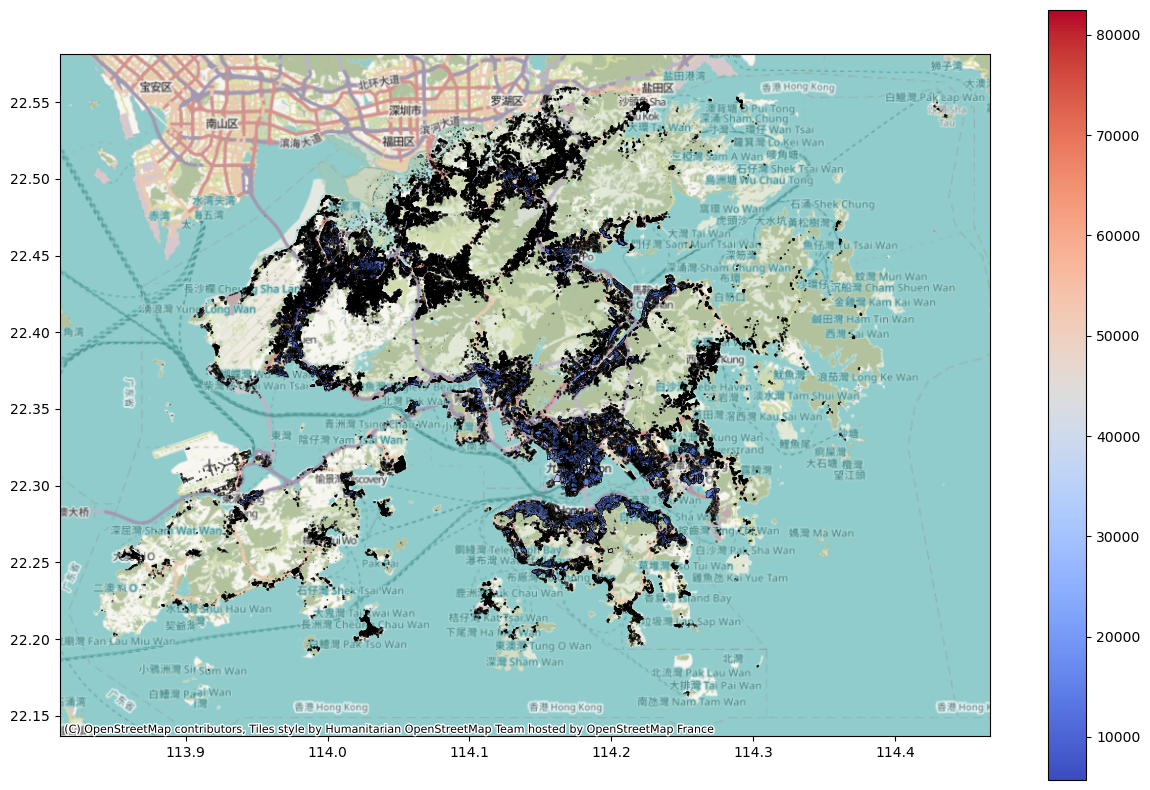

In [ ]:
# 绘制地图(building)
fig, ax = plt.subplots(figsize=(15, 10))
ax = building_shp.plot(ax=ax, alpha=0.5, color="white", edgecolor="black")
cx.add_basemap(ax, crs=building_shp.crs)  ## 添加瓦片地图
merged_agg_geometry.plot(ax=ax, column='price_median', cmap='coolwarm', legend=True)

## building type

In [ ]:
## 每个building的type，取每个building出现次数最多的type
merged_type = merged[['OBJECTID','location_type']]
merged_type = merged_t[merged_t['location_type'] != r'\N']
merged_type

,OBJECTID,location_type
7021,7022,building-apartments
7140,7141,building-apartments
7021,7022,building-apartments
7140,7141,building-apartments
7021,7022,building-apartments
...,...,...
333258,333259,building-roof
333258,333259,building-roof
333258,333259,building-roof
333258,333259,building-roof


In [ ]:
## 计算每个 OBJECTID 的每个 location_type 出现的次数
counts = merged_type.groupby(['OBJECTID', 'location_type']).size()

## 保存 OBJECTID 和 这个OBJECTID出现次数最多的 location_type
max_location_type = counts.groupby('OBJECTID').idxmax().apply(lambda x: x[1])

building_type = pd.DataFrame({'OBJECTID': max_location_type.index, 'location_type_max': max_location_type.values})
building_type

,OBJECTID,location_type_max
0,7022,building-apartments
1,7046,building-apartments
2,7055,building-apartments
3,7071,building-apartments
4,7075,building-apartments
...,...,...
24376,333501,building-residential
24377,333502,building-residential
24378,333515,building-residential
24379,333526,building-residential


In [ ]:
## 保存数据：building_type
building_type.to_csv(path + "building_type.csv", index=False)

## 关联building_type和merged_agg_geometry #building_info(geoDataFrame)

In [ ]:
## merged_agg_geometry join building_type 获取 location_type_max
building_info = merged_agg_geometry.merge(building_type, on='OBJECTID', how='left')
building_info

,OBJECTID,geometry,price_median,location_type_max
0,6943,"POLYGON ((113.93816 22.28953, 113.93819 22.289...",12703.0,NaN
1,6946,"POLYGON ((113.93864 22.28953, 113.93862 22.289...",12703.0,NaN
2,6950,"POLYGON ((113.93825 22.28954, 113.93821 22.289...",12703.0,NaN
3,7022,"POLYGON ((113.93885 22.28843, 113.93884 22.288...",15645.0,building-apartments
4,7046,"POLYGON ((113.93908 22.28872, 113.93910 22.288...",12703.0,building-apartments
...,...,...,...,...
35310,338164,"POLYGON ((114.30077 22.39167, 114.30075 22.391...",17986.0,NaN
35311,338168,"POLYGON ((114.30073 22.39207, 114.30083 22.392...",17986.0,NaN
35312,338178,"POLYGON ((114.30083 22.39145, 114.30080 22.391...",17986.0,NaN
35313,338200,"POLYGON ((114.30093 22.39193, 114.30090 22.392...",17986.0,NaN


In [ ]:
## 保存数据：building_info
building_info.to_csv(path + "building_info.csv", index=False)

## tpu展示房价

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
# from shapely.geometry import Polygon
import os
import datetime
import matplotlib.pyplot as plt
import contextily as cx

In [ ]:
## 读取point_price
path = 'process data/dataset1/'
df = pd.read_csv(path + 'dataset_1.csv')
df_cleaned = df[df['price_sqft_location'] != r'\N']
df_cleaned['price_sqft_location'] = pd.to_numeric(df_cleaned['price_sqft_location'], errors='coerce')
df_cleaned['price_sqft_location'].astype(float)

## 将价格数据转换为GeoDataFrame
geometry = gpd.points_from_xy(df_cleaned['longitude'], df_cleaned['latitude'])
building_price_gdf = gpd.GeoDataFrame(df_cleaned, geometry=geometry)
building_price_gdf.crs = 'EPSG:4326'
building_price_gdf = building_price_gdf.iloc[:,2:]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7576\2317751364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_sqft_location'] = pd.to_numeric(df_cleaned['price_sqft_location'], errors='coerce')


In [ ]:
## 读取point_price
# point_price_gdf = gpd.read_file(path + 'point_price.csv'，)
point_price_gdf = building_price_gdf[['price_sqft_location', 'geometry']]
point_price_gdf

,price_sqft_location,geometry
0,14695.600000,POINT (114.19830 22.29125)
11,15450.666667,POINT (114.18338 22.34275)
12,15450.666667,POINT (114.18338 22.34275)
13,15450.666667,POINT (114.18338 22.34276)
14,23536.636364,POINT (114.17836 22.37270)
...,...,...
62968895,13971.285714,POINT (114.26022 22.32153)
62968896,13971.285714,POINT (114.26023 22.32153)
62968897,13971.285714,POINT (114.26026 22.32153)
62968898,13971.285714,POINT (114.26026 22.32158)


In [ ]:
## 读取tpu shape file
gfs = []
for f in os.listdir('tpu_data_geo/'):
    if 'shp' not in f:
        continue
    if '._' in f:
        continue
    ## GBK for encode Chinese
    shapefile = gpd.read_file('tpu_data_geo/%s' % f, encoding="GBK")
    tupid = f.split('_')[1].split('.')[0]
    shapefile['tpuid'] = tupid
    ## set crs
    shapefile.crs = 'EPSG:4326'
    gfs.append(shapefile)
gfs = gpd.GeoDataFrame(pd.concat(gfs))
## select two columns only
sel_cols = ['tpuid', 'geometry']
gfs_sel = gfs[sel_cols]

In [ ]:
## point_price_gdf 与 tpu shape file 关联
merged_tpu_price = gpd.sjoin(gfs_sel, point_price_gdf, how='left', predicate='intersects')
merged_tpu_price = merged_tpu_price.drop('index_right', axis=1)
merged_tpu_price

,tpuid,geometry,price_sqft_location
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000
...,...,...,...
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333


In [ ]:
merged_tpu_agg = merged_tpu_price.copy()
merged_tpu_agg['price_median'] = merged_tpu_agg.groupby('tpuid')['price_sqft_location'].transform('median')
merged_tpu_agg = merged_tpu_agg.drop('price_sqft_location', axis=1)
# merged_tpu_agg = merged_tpu_agg.drop_duplicates()
merged_tpu_agg

,tpuid,geometry,price_sqft_location,price_median
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000,19212.166667
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000,19212.166667
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000,19212.166667
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000,19212.166667
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",16771.000000,19212.166667
...,...,...,...,...
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333,11931.347826
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333,11931.347826
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333,11931.347826
0,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",13094.333333,11931.347826


In [ ]:
merged_tpu_agg = merged_tpu_agg.groupby('tpuid').first().reset_index()
merged_tpu_agg

,tpuid,geometry,price_median
0,111,"MULTIPOLYGON (((114.12294 22.27288, 114.12285 ...",19212.166667
1,112,"POLYGON ((114.13725 22.28459, 114.13723 22.284...",23430.631579
2,113,"POLYGON ((114.14963 22.28368, 114.14940 22.283...",17310.000000
3,114,"POLYGON ((114.15307 22.28257, 114.15274 22.282...",22360.571429
4,115,"POLYGON ((114.14818 22.28841, 114.14801 22.288...",18269.000000
...,...,...,...
209,950S,"MULTIPOLYGON (((113.97876 22.32745, 113.97876 ...",12550.500000
210,961S,"MULTIPOLYGON (((114.00320 22.26172, 114.00317 ...",NaN
211,971S,"MULTIPOLYGON (((114.07899 22.28688, 114.07901 ...",10301.800000
212,975,"MULTIPOLYGON (((114.06239 22.34132, 114.06240 ...",11931.347826


In [ ]:
# duplicates = merged_tpu_agg.duplicated()

# # 过滤掉重复的行
# merged_tpu_agg = merged_tpu_agg[~duplicates]

GEOSException: bad allocation

In [ ]:
# merged_tpu_agg = merged_tpu_agg.drop_duplicates()
# merged_tpu_agg

GEOSException: bad allocation

<Axes: >

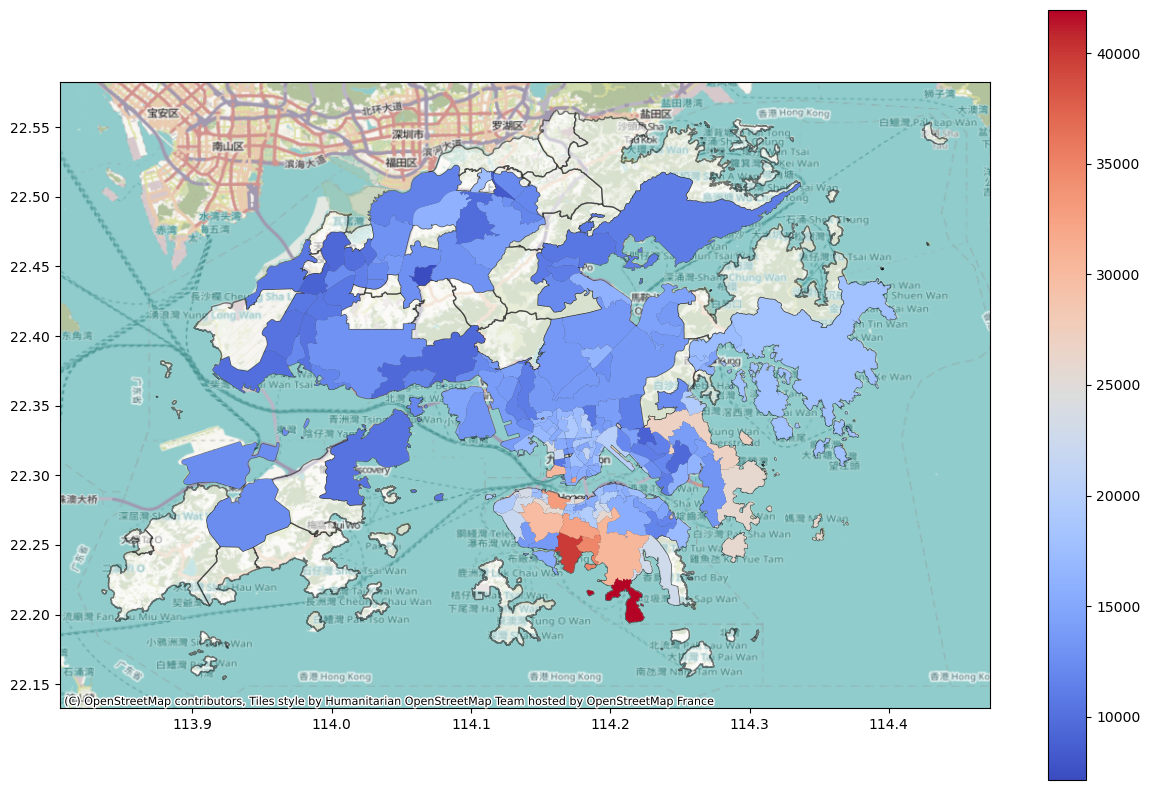

In [ ]:
## 绘制地图(tpu)
fig, ax = plt.subplots(figsize=(15, 10))
ax = gfs_sel.plot(ax=ax, alpha=0.5, color="white", edgecolor="black")
cx.add_basemap(ax, crs=gfs_sel.crs)  ## 添加瓦片地图
merged_tpu_agg.plot(ax=ax, column='price_median', cmap='coolwarm', legend=True)